# Numerical Computing with NumPy
## Why?
In Python we can use `lists` to store and manipulate sequences of objects, any objects.<br>
While that is very convenient for us it comes at a cost of time and memory.

In this example we create 1,000,000 integers

In [1]:
import random 
measurements = [random.randint(150, 200) for _ in range(1_000_000)]
measurements[:10]

[192, 187, 192, 167, 153, 196, 200, 171, 158, 179]

and compute their mean


In [2]:
list_time = %timeit -o sum(measurements) / len(measurements)

6.85 ms ± 119 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Because python doesn't know that our list only contains integers, it has to check everytime it adds values together whether the objects actually support addition.<br>
And thats why `sum` takes "so long"

If we could tell the interpreter that we are only adding integers, we could skip all that typechecking and speed up the operation.<br> 
For this purpose, `numpy` was invented.  
<br>

To use numpy we have to import it. The import is usually aliased as `np` so we have to type less later on. Aliasing things is only recommended if it is well established in the community of the respective package.

In [3]:
import numpy as np

Numpy's standard datatype is the `ndarray` (which stands for n-dimensional array). In the simplest case, numpy array can be created from list.

In [4]:
measurements_array = np.array(measurements)
measurements_array

array([192, 187, 192, ..., 180, 165, 184])

<br>

Now we can use the `mean` function provided by Numpy

In [5]:
numpy_time = %timeit -o np.mean(measurements_array)

875 µs ± 31.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


As we can see, using Numpy significantly speeds up our computation, making it

In [6]:
print(f"{list_time.average / numpy_time.average} times faster")

7.832971216504515 times faster


# Numpy Arrays


In [7]:
import numpy as np

<br>

# How to create Arrays
<br>

## from lists
As we already saw we can create Numpy Arrays from lists

In [8]:
np.array([10,2,35])

array([10,  2, 35])

<br>

## using Numpy functions
whenever we don't want to create an array from specific values like `10, 2, 35` we can use Numpy's utility functions.<br>
These are also faster than Pythons built-in functions.

#### `np.arange`
works like `range`

In [9]:
list(range(5))

[0, 1, 2, 3, 4]

In [10]:
np.arange(start=2, stop=14, step=2)

array([ 2,  4,  6,  8, 10, 12])

but is faster

In [11]:
built_in_time = %timeit -o np.array(range(1_000_000))

80.4 ms ± 1.35 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [12]:
numpy_time = %timeit -o np.arange(1_000_000)

1.06 ms ± 13 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [13]:
# print(f"Numpy is {built_in_time.average/numpy_time.average} times faster")

<br>

#### `np.linspace`
Creating an array with a certain number of values in a certain interval.

In [14]:
np.linspace(start=-5, stop=5, num=9)

array([-5.  , -3.75, -2.5 , -1.25,  0.  ,  1.25,  2.5 ,  3.75,  5.  ])

<br>

#### `np.zeros`
Creating an array with only zeros.

In [15]:
np.zeros(3)

array([0., 0., 0.])

`np.zeros` takes a `shape` argument that lets us create multidimensional arrays.

In [16]:
np.zeros((2, 4, 3))

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

<br>

#### the same goes for `np.ones`, `np.empty` and `np.full`
#### `np.ones`

In [17]:
np.ones(shape=(2, 4, 3))

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

#### `np.empty`
Corresponds to whatever was left in memory. Faster than `np.ones` and `np.zeros`

In [18]:
np.empty(shape=(2, 4, 3))

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [19]:
empty_time = %timeit -o np.empty(shape=100_000)
ones_time = %timeit -o np.ones(shape=100_000)

print(f"\nempty is {ones_time.average/empty_time.average} times faster")

784 ns ± 8.71 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
17.8 µs ± 252 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

empty is 22.735242449907876 times faster


<br>

#### `np.full`
creates an array filled with the same value

In [20]:
np.full(shape=(2, 4, 3), fill_value=42)

array([[[42, 42, 42],
        [42, 42, 42],
        [42, 42, 42],
        [42, 42, 42]],

       [[42, 42, 42],
        [42, 42, 42],
        [42, 42, 42],
        [42, 42, 42]]])

<br>

### Exercise
Create a `3*3 array` that solely consists of `True`.

<br>

## Anatomy of arrays

#### `dtype`
Returns data type of the array. Arrays can contain bools, ints, unsigned ints, floats or complex numbers of various byte sizes.<br>
They can also store strings or Python objects, but that has very few use cases.

In [21]:
values = [0, 1, 2, 3, 4]
int_arr = np.array(values, dtype='int')
int_arr, int_arr.dtype

(array([0, 1, 2, 3, 4]), dtype('int32'))

If the dtype does not match the given values, numpy will cast everything to that data type.

In [22]:
bool_arr = np.array(values, dtype='bool')
bool_arr, bool_arr.dtype

(array([False,  True,  True,  True,  True]), dtype('bool'))

If no explicit data type is given, numpy will choose the "smallest common denominator". <br>
In the following example, everything becomes a float, as ints can be represented as floats, but not vice versa.

In [23]:
values = [0, 1, 2.5, 3, 4]
float_arr = np.array(values)
float_arr, float_arr.dtype

(array([0. , 1. , 2.5, 3. , 4. ]), dtype('float64'))

However, once the data type is set, everything will be coerced to that type.'

In [24]:
values = [0, 1, 2, 3, 4]
int_arr = np.array(values, dtype='int')

int_arr[0] = 1.5
int_arr

array([1, 1, 2, 3, 4])

Numpy's non-Python data types force us to again think about problems like overflow etc.

In [25]:
values = [0, 1, 2, 3, 4]
uint_arr = np.array(values, dtype='uint8')
uint_arr, uint_arr.dtype

(array([0, 1, 2, 3, 4], dtype=uint8), dtype('uint8'))

In [26]:
uint_arr[1] += 255
uint_arr

array([0, 0, 2, 3, 4], dtype=uint8)

...and can lead to some problems when comparing them to standard python types

In [27]:
val = 1.2 - 1.0
arr = np.array([val], dtype=np.float32)
print(f'{val} == {arr[0]} -> {val == arr[0]}')

print(type(val))
print(type(arr[0]))

0.19999999999999996 == 0.20000000298023224 -> False
<class 'float'>
<class 'numpy.float32'>


Numpy provides a function for these cases

In [28]:
np.isclose(val, arr[0])

True

[Why are floating point calculations inaccurate](http://effbot.org/pyfaq/why-are-floating-point-calculations-so-inaccurate.htm)

<br>

### `shape` and `ndim`
`.shape` is very important for keeping track of arrays with more than one dimension. It is a tuple with the number of elements in each dimension.<br>
`.ndim` is just the number of dimensions in total. 

### 1D

In [29]:
values = [1, 2, 3, 4]
one_dim_arr = np.array(values)
one_dim_arr

array([1, 2, 3, 4])

In [30]:
one_dim_arr.shape

(4,)

In [31]:
one_dim_arr.ndim

1

### 2D

In [32]:
values = [[1, 2, 3, 4, 5],
          [1, 2, 3, 4, 1],
          [1, 2, 3, 4, 2]]
two_dim_arr = np.array(values)
two_dim_arr

array([[1, 2, 3, 4, 5],
       [1, 2, 3, 4, 1],
       [1, 2, 3, 4, 2]])

In [33]:
two_dim_arr.shape

(3, 5)

In [34]:
two_dim_arr.ndim

2

In [35]:
two_dim_arr[1,1]

2

In [36]:
two_dim_arr[1,1] = 10
two_dim_arr

array([[ 1,  2,  3,  4,  5],
       [ 1, 10,  3,  4,  1],
       [ 1,  2,  3,  4,  2]])

### 3D

In [37]:
values = [[[1, 2, 3, 4]] * 3] * 6
three_dim_arr = np.array(values)
three_dim_arr

array([[[1, 2, 3, 4],
        [1, 2, 3, 4],
        [1, 2, 3, 4]],

       [[1, 2, 3, 4],
        [1, 2, 3, 4],
        [1, 2, 3, 4]],

       [[1, 2, 3, 4],
        [1, 2, 3, 4],
        [1, 2, 3, 4]],

       [[1, 2, 3, 4],
        [1, 2, 3, 4],
        [1, 2, 3, 4]],

       [[1, 2, 3, 4],
        [1, 2, 3, 4],
        [1, 2, 3, 4]],

       [[1, 2, 3, 4],
        [1, 2, 3, 4],
        [1, 2, 3, 4]]])

In [38]:
three_dim_arr.shape

(6, 3, 4)

In [39]:
three_dim_arr.ndim

3

<br>

### Other attributes

In [40]:
two_dim_arr

array([[ 1,  2,  3,  4,  5],
       [ 1, 10,  3,  4,  1],
       [ 1,  2,  3,  4,  2]])

In [41]:
two_dim_arr.T

array([[ 1,  1,  1],
       [ 2, 10,  2],
       [ 3,  3,  3],
       [ 4,  4,  4],
       [ 5,  1,  2]])

In [42]:
print(dir(two_dim_arr))

['T', '__abs__', '__add__', '__and__', '__array__', '__array_finalize__', '__array_function__', '__array_interface__', '__array_prepare__', '__array_priority__', '__array_struct__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__complex__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dir__', '__divmod__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__ilshift__', '__imatmul__', '__imod__', '__imul__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lshift__', '__lt__', '__matmul__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rlshift_

### Repeating values

``np.repeat`` repeats elements of an array:

In [43]:
np.repeat(3, 5)

array([3, 3, 3, 3, 3])

In [44]:
%%timeit -n100000
np.array([3]*500)

29.3 µs ± 96.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [45]:
%%timeit
np.repeat(3, 500)

4.54 µs ± 46.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [46]:
np.repeat([[1,2],[3,4]], 2)

array([1, 1, 2, 2, 3, 3, 4, 4])

`np.tile` is another way of repeating values using NumPy.

In [47]:
print('Repeat:', np.repeat([1, 2, 3], 3))
print('Tile:', np.tile([1, 2, 3], 3))

Repeat: [1 1 1 2 2 2 3 3 3]
Tile: [1 2 3 1 2 3 1 2 3]


### Reshape

In [48]:
a = np.arange(start=2, stop=14)
print(a.shape)
a

(12,)


array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [49]:
b = a.reshape(3, 4)
b

array([[ 2,  3,  4,  5],
       [ 6,  7,  8,  9],
       [10, 11, 12, 13]])

-1 as axis automatically figures out the size of the respective dimension

In [50]:
# numpy.random will be introduced below
from numpy.random import randint
n = randint(20)
a = np.tile([1,2], n)
print(a)
a.reshape(-1, 2)

[1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


array([[1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2]])

### Example
We would like to create an 2D array where each row is [1, 2, 3] and it should have 10 rows.

In [51]:
import numpy as np

In [52]:
# Example output (slower than numpy)
np.array([np.array([1,2,3]) for _ in range(10)])

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [53]:
np.repeat(np.arange(1, 4), 10).reshape(-1, 10).T

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [54]:
np.tile(np.arange(1, 4), 10).reshape(10, -1)

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [55]:
np.arange(1,4)

array([1, 2, 3])

In [56]:
np.repeat(np.arange(1,4), 10)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3])

In [57]:
np.repeat(np.arange(1,4), 10).reshape(10, 3)

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 2, 2],
       [2, 2, 2],
       [2, 2, 2],
       [2, 2, 3],
       [3, 3, 3],
       [3, 3, 3],
       [3, 3, 3]])

In [58]:
np.tile(np.arange(1, 4), 10)

array([1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1,
       2, 3, 1, 2, 3, 1, 2, 3])

### Comparing Arrays

In [59]:
epsilon = 0.000000000001
a = np.zeros((3,3))
a[0,0] += epsilon

b = np.zeros((3,3))
print(a)
print(b)

[[1.e-12 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [60]:
a == b

array([[False,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [61]:
(a == b).all()

False

In [62]:
c = np.array([])
d = np.array([1])
(c == d).all()

True

flaws with doing this: 
* if either a or b is empty and the other one contains a single element, this will return True. (the comparison a==b returns an empty array, for which the all-operator returns True)
* If a and b don't have the same shape and aren't broadcastable, then this approach will raise an error.

Instead, use numpys provided functions!

In [63]:
np.array_equal(c, d)

False

In [64]:
np.allclose(a, b)

True

In [65]:
np.isclose(a, b)

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

## Mathematical operations
Numpy contains a lot of mathematical functions that operate on arrays in a vectorized manner. That means that they are applied to each element, without explicit for-loops. Vectorized functions are called `ufuncs` (universal functions) in Numpy.

### Standard arithmetic

In [66]:
arr = np.arange(9)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [67]:
arr * 3

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24])

In [68]:
arr * arr

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64])

In [69]:
arr + (arr*2)

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24])

In [70]:
arr - arr

array([0, 0, 0, 0, 0, 0, 0, 0, 0])

In [71]:
arr / arr

C:\Users\argha\AppData\Local\Temp/ipykernel_13072/3001117470.py:1: RuntimeWarning: invalid value encountered in true_divide
  arr / arr


array([nan,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [72]:
arr ** 2

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64], dtype=int32)

Using `@` you can even do matrix multiplication. In the case of 1d arrays, this is the inner product between two vectors.

In [73]:
arr @ arr.T

204

In [74]:
# That's the same as
np.sum(arr * arr)

204

Using these operators/universal function is usually faster than writing the operations otherwise.

In [75]:
var1 = lambda: np.repeat(np.arange(1, 4), 30).reshape(3, -1).T.flatten()
var2 = lambda: np.arange(3 * 30) % 3 + 1
var3 = lambda: np.array([[1, 2, 3] for _ in range(30)]).flatten()

print(var1())
print(var2())
print(var3())

%timeit var1()
%timeit var2()
%timeit var3()

[1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1
 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2
 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3]
[1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1
 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2
 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3]
[1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1
 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2
 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3]
3.42 µs ± 55.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
2.36 µs ± 38.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
18 µs ± 74.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Numpy Constants
https://numpy.org/doc/stable/reference/constants.html

In [76]:
np.pi

3.141592653589793

In [77]:
np.e

2.718281828459045

In [78]:
np.inf

inf

In [79]:
np.inf > 999999999999999999999999999999999999999999999999999999999999999999999

True

In [80]:
-np.inf

-inf

In [81]:
np.inf-np.inf

nan

In [82]:
np.array([0])/np.array([0])

C:\Users\argha\AppData\Local\Temp/ipykernel_13072/2769199799.py:1: RuntimeWarning: invalid value encountered in true_divide
  np.array([0])/np.array([0])


array([nan])

In [83]:
np.nan == np.nan

False

In [84]:
np.isnan(np.nan)

True

In [85]:
a = np.r_[np.arange(5), np.repeat(0, 5)]
a

array([0, 1, 2, 3, 4, 0, 0, 0, 0, 0])

In [86]:
b = a / a
b

C:\Users\argha\AppData\Local\Temp/ipykernel_13072/1505135007.py:1: RuntimeWarning: invalid value encountered in true_divide
  b = a / a


array([nan,  1.,  1.,  1.,  1., nan, nan, nan, nan, nan])

In [87]:
~np.isnan(b)

array([False,  True,  True,  True,  True, False, False, False, False,
       False])

In [88]:
b[~np.isnan(b)]

array([1., 1., 1., 1.])

In [89]:
np.divide(a, a, out=np.zeros(a.shape), where=(a!=0)) 
# at the positions where a!=0, make the division,
# at other indices use what's specified as "out"

array([0., 1., 1., 1., 1., 0., 0., 0., 0., 0.])

### Some standard functions

In [90]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [91]:
np.log(arr)

C:\Users\argha\AppData\Local\Temp/ipykernel_13072/3120950136.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(arr)


array([      -inf, 0.        , 0.69314718, 1.09861229, 1.38629436,
       1.60943791, 1.79175947, 1.94591015, 2.07944154])

In [92]:
np.log2(arr)

C:\Users\argha\AppData\Local\Temp/ipykernel_13072/1405652587.py:1: RuntimeWarning: divide by zero encountered in log2
  np.log2(arr)


array([      -inf, 0.        , 1.        , 1.5849625 , 2.        ,
       2.32192809, 2.5849625 , 2.80735492, 3.        ])

In [93]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03])

In [94]:
np.sin(arr)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825])

np.sign returns -1 for negative values, +1 for positive ones, and 0 for 0:

In [95]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [96]:
np.sign(np.arange(-1,5))

array([-1,  0,  1,  1,  1,  1])

Always try to use vectorized ufuncs instead of explicit loops!

### Aggregation functions
Aggregation functions are functions that reduce the dimensionality of an array. They provide an `axis` argument, to specify which dimension to reduce.

In [97]:
# np.random will be explained in another section
np.random.seed(1)
two_dim_arr = np.random.randint(0, high=20, size=(3, 4))
two_dim_arr

array([[ 5, 11, 12,  8],
       [ 9, 11,  5, 15],
       [ 0, 16,  1, 12]])

If just the array is passed, the aggregation operation is performed over the whole array.

In [98]:
np.min(two_dim_arr)

0

The optional `axis` argument allows us to specify, which dimension should be aggregated. You can think of it as the operation being applied to all entries that are obtained by keeping the indices in all dimensions fixed except for the `axis` dimension.
Let's look at the result of the minimum operation with `axis=0`:

In [99]:
np.min(two_dim_arr, axis=1)

array([5, 5, 0])

In [100]:
print(two_dim_arr.shape)
print(np.min(two_dim_arr, axis=0).shape)
print(np.min(two_dim_arr, axis=1).shape)

(3, 4)
(4,)
(3,)


The axis concept extends to more than one dimension

In [101]:
np.random.seed(1)
three_dim_arr = np.random.randint(0, high=20, size=(2, 3, 4))
three_dim_arr

array([[[ 5, 11, 12,  8],
        [ 9, 11,  5, 15],
        [ 0, 16,  1, 12]],

       [[ 7, 13,  6, 18],
        [ 5, 18, 11, 10],
        [14, 18,  4,  9]]])

In [102]:
np.min(three_dim_arr, axis=1)

array([[ 0, 11,  1,  8],
       [ 5, 13,  4,  9]])

In the array above the entry at index `[0, 0]`, is the minimum of the following values. 

In [103]:
for i in range(3):
    print(three_dim_arr[0, i, 0])

5
9
0


Let's demonstrate all axes again with another three-dimensional array:

In [104]:
a = np.array([[[2,4],[6,9]],[[3,1],[7,8]],[[4,5],[9, 0]]])
a, a.shape

(array([[[2, 4],
         [6, 9]],
 
        [[3, 1],
         [7, 8]],
 
        [[4, 5],
         [9, 0]]]),
 (3, 2, 2))

In [105]:
np.min(a)

0

In [106]:
np.min(a, axis=0)

array([[2, 1],
       [6, 0]])

setting the axis-argument is the same as going through all other axes of the respective array in turn, returning the respective aggregate for every combination of these.

In [107]:
for i in range(a.shape[1]):
    for j in range(a.shape[2]):
        print(a[:, i, j])

[2 3 4]
[4 1 5]
[6 7 9]
[9 8 0]


For axis=1, we loop through axis 0 and axis 2:

In [108]:
a

array([[[2, 4],
        [6, 9]],

       [[3, 1],
        [7, 8]],

       [[4, 5],
        [9, 0]]])

In [109]:
np.min(a, axis=1)

array([[2, 4],
       [3, 1],
       [4, 0]])

In [110]:
for i in range(a.shape[0]):
    for j in range(a.shape[2]):
        print(a[i, :, j])

[2 6]
[4 9]
[3 7]
[1 8]
[4 9]
[5 0]


...and finally, for axis 2 we loop through axis 0 and 1

In [111]:
a

array([[[2, 4],
        [6, 9]],

       [[3, 1],
        [7, 8]],

       [[4, 5],
        [9, 0]]])

In [112]:
np.min(a, axis=2)

array([[2, 6],
       [1, 7],
       [4, 0]])

In [113]:
for i in range(a.shape[0]):
    for j in range(a.shape[1]):
        print(a[i, j, :])

[2 4]
[6 9]
[3 1]
[7 8]
[4 5]
[9 0]


The shape of the resulting array is simply the shape of the original array, leaving the specified axis out:

In [114]:
mins = []
for i in range(a.shape[0]):
    for j in range(a.shape[1]):
        mins.append(min(a[i,j,:]))
np.array(mins).reshape([a.shape[0], a.shape[1]])

array([[2, 6],
       [1, 7],
       [4, 0]])

...however, of course, using numpy is much faster than looping over the array:

In [115]:
def find_min_manual(arr):
    mins = []
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            mins.append(min(arr[i,j,:]))
    np.array(mins).reshape([arr.shape[0], arr.shape[1]])

%timeit find_min_manual(a)
%timeit np.min(a, axis=2)

7.59 µs ± 140 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
3.99 µs ± 58.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### More than one Dimension

Aggregation functions can also aggregate more than one dimension at once.

In [116]:
three_dim_arr = np.random.randint(0, 10, (4, 2, 3))
three_dim_arr

array([[[1, 7, 0],
        [6, 9, 9]],

       [[7, 6, 9],
        [1, 0, 1]],

       [[8, 8, 3],
        [9, 8, 7]],

       [[3, 6, 5],
        [1, 9, 3]]])

In [117]:
np.min(three_dim_arr, axis=(1, 2))

array([0, 0, 3, 1])

### Other aggregation functions.

In [118]:
two_dim_arr

array([[ 5, 11, 12,  8],
       [ 9, 11,  5, 15],
       [ 0, 16,  1, 12]])

In [119]:
np.max(two_dim_arr)

16

In [120]:
np.max(two_dim_arr, axis=0)

array([ 9, 16, 12, 15])

In [121]:
np.max(two_dim_arr, axis=1)

array([12, 15, 16])

In [122]:
np.sum(two_dim_arr)

105

In [123]:
np.sum(two_dim_arr, axis=0)

array([14, 38, 18, 35])

In [124]:
np.sum(two_dim_arr, axis=1)

array([36, 40, 29])

In [125]:
np.average(two_dim_arr, axis=0)

array([ 4.66666667, 12.66666667,  6.        , 11.66666667])

In [126]:
np.product(two_dim_arr, axis=0)

array([   0, 1936,   60, 1440])

In [127]:
# And so on...

Many of these function are also available as method on the array object.

In [128]:
two_dim_arr.sum(axis=0)

array([14, 38, 18, 35])

### Flattening
We would like to convert any given array into a 1D array.

In [129]:
a = np.arange(64).reshape((2,2,2,2,2,2))
a

array([[[[[[ 0,  1],
           [ 2,  3]],

          [[ 4,  5],
           [ 6,  7]]],


         [[[ 8,  9],
           [10, 11]],

          [[12, 13],
           [14, 15]]]],



        [[[[16, 17],
           [18, 19]],

          [[20, 21],
           [22, 23]]],


         [[[24, 25],
           [26, 27]],

          [[28, 29],
           [30, 31]]]]],




       [[[[[32, 33],
           [34, 35]],

          [[36, 37],
           [38, 39]]],


         [[[40, 41],
           [42, 43]],

          [[44, 45],
           [46, 47]]]],



        [[[[48, 49],
           [50, 51]],

          [[52, 53],
           [54, 55]]],


         [[[56, 57],
           [58, 59]],

          [[60, 61],
           [62, 63]]]]]])

In [130]:
a.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

## Extending arrays

### Adding new dimensions with `np.newaxis`

In [131]:
one_dim_arr = np.arange(5)
one_dim_arr, one_dim_arr.shape

(array([0, 1, 2, 3, 4]), (5,))

In [132]:
two_dim_arr = one_dim_arr[np.newaxis, :]
two_dim_arr, two_dim_arr.shape

(array([[0, 1, 2, 3, 4]]), (1, 5))

In [133]:
two_dim_arr = one_dim_arr[:, np.newaxis, np.newaxis]
two_dim_arr, two_dim_arr.shape

(array([[[0]],
 
        [[1]],
 
        [[2]],
 
        [[3]],
 
        [[4]]]),
 (5, 1, 1))

In [134]:
import numpy as np
print(np.newaxis==None)

True


Instead of `np.newaxis`, `None` can be used. Both is exactly equivalent, except that `np.newaxis` is more explicit.

In [135]:
print(np.newaxis is None)
two_dim_arr = one_dim_arr[:, None]
two_dim_arr, two_dim_arr.shape

True


(array([[0],
        [1],
        [2],
        [3],
        [4]]),
 (5, 1))

Adding new dimensions is useful for example when Tensorflow is used to batch-inputs, but you want to provide a single datapoint for prediction:

In [136]:
minibatch = one_dim_arr[None, :]

# Tensorflow will internally iterate over all data of the batch, without the new axis there would be an error
for datum in minibatch:
    print("tensorflow_model.fit(datum)")

tensorflow_model.fit(datum)


### Removing dimensions

``arr.squeeze()`` removes dimensions of size 1:

In [137]:
one_dim_arr = np.arange(5)
two_dim_arr = one_dim_arr[np.newaxis, :]
two_dim_arr, two_dim_arr.shape

(array([[0, 1, 2, 3, 4]]), (1, 5))

In [138]:
two_dim_arr.squeeze(), two_dim_arr.squeeze().shape

(array([0, 1, 2, 3, 4]), (5,))

In [139]:
two_dim_arr.flatten() == two_dim_arr.squeeze()

array([ True,  True,  True,  True,  True])

In [140]:
a = np.arange(6).reshape(2, 1, 3, 1)
a, a.shape

(array([[[[0],
          [1],
          [2]]],
 
 
        [[[3],
          [4],
          [5]]]]),
 (2, 1, 3, 1))

Dimensions of size > 1 are kept intact.

In [141]:
print(a.squeeze(), a.squeeze().shape,"\n")
print(a.flatten(), a.flatten().shape)

[[0 1 2]
 [3 4 5]] (2, 3) 

[0 1 2 3 4 5] (6,)


### Combining arrays
There are many ways to combine existing arrays, like `np.append`, `np.concatenate` and `np.stack`. However, these operations always require the whole array to be copied. Therefore, it often makes more sense to allocate an array of the size you need later upfront and then just fill the respective parts.

In [142]:
a = np.arange(10)
b = np.arange(10)[::-1]
# Needs a sequence (in this case a tuple) of array-likes
np.concatenate((a,b))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

``np.append`` uses concatenation internally:

In [143]:
# Needs exactly two array-likes
np.append(a, b)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

For higher-dimensional arrays, other functions are useful:

In [144]:
np.stack((np.arange(10), np.arange(10)))

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

There are also the functions ``np.vstack`` (vertical/row-wise-stacking) and ``np.hstack`` (horizontal/column-wise-stacking):
* hstack is equivalent to concatenation along the second axis, except for 1-D arrays where it concatenates along the first axis
* vstack is equivalent to concatenation along the first axis after 1-D arrays of shape (N,) have been reshaped to (1,N).

In [145]:
two_dim_arr = np.arange(16).reshape(4, -1)
two_dim_arr_2 = np.arange(16).reshape(4, -1) + 16
two_dim_arr, two_dim_arr_2

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]]),
 array([[16, 17, 18, 19],
        [20, 21, 22, 23],
        [24, 25, 26, 27],
        [28, 29, 30, 31]]))

In [146]:
np.hstack((two_dim_arr, two_dim_arr_2))

array([[ 0,  1,  2,  3, 16, 17, 18, 19],
       [ 4,  5,  6,  7, 20, 21, 22, 23],
       [ 8,  9, 10, 11, 24, 25, 26, 27],
       [12, 13, 14, 15, 28, 29, 30, 31]])

In [147]:
np.concatenate((two_dim_arr, two_dim_arr_2), axis=1)

array([[ 0,  1,  2,  3, 16, 17, 18, 19],
       [ 4,  5,  6,  7, 20, 21, 22, 23],
       [ 8,  9, 10, 11, 24, 25, 26, 27],
       [12, 13, 14, 15, 28, 29, 30, 31]])

In [148]:
np.vstack((two_dim_arr, two_dim_arr_2))

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [149]:
np.concatenate((two_dim_arr, two_dim_arr_2), axis=0)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

A quick and easy way to combine scalars and arrays is using ``np.r_``, with the desired arrays, lists, or numbers in square brackets:

In [150]:
np.r_[2, 2, 2, np.arange(10), np.arange(10)[::-1], [0, 1, 2]]

array([2, 2, 2, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 8, 7, 6, 5, 4, 3, 2, 1,
       0, 0, 1, 2])

#### tl;dr: What exactly is this np.r_?
For finding this out I had to go into the code of numpy itself, it is not really in the documentation (there it only says that this is not a function... so what is it then?). To be honest: best just accept it the way it is. Otherwise, here's the story:

``np.r_`` is a variable from the numpy namespace and is created in "index_tricks.py". In this variable the instantiation of an `RClass` object is saved. This ``RClass`` is a wrapper for the ``AxisConcatenator`` class with the single purpose of creating a specific kind of Axis concatenator oject. Namely, it is the same as `AxisConcatenator(axis = 0)`. AxisConcatenator implements the `__getitem__` method, that is why we can use the squared brackets behind `np.r_`. This is a bit confusing, usually we use the squared brackets after a variable for indexing. But at the same time this is an extremely efficient way of implementing the functionality of `np.r_`. And since numpy is all about efficiency, we should forgive this questionable syntax and make use of it where ever possible.

### Broadcasting
What happens if you try to add arrays of different shapes? Numpy will try to expand the arrays according to three rules and try to make their shapes match, so the operation can be applied elementwise. 

**1. Rule** If the arrays have different numbers of dimensions, the smaller shape is padded with ones on its left side.<br/>
            Example: (5 x 3) + (3) &rarr; (5 x 3) + (**1** x 3)<br/>
**2. Rule** If the number of the dimensions matches, but the size of a dimension does not, dimensions with the size of 1 are expanded.<br/>
            Example: (5 x 3) + (1 x 3) &rarr; (5 x 3) + (**5** x 3)<br/>
**3. Rule** If the shapes of the  arrays still defer after applying the Rule 1 and 2, a broadcasting error is raised.

The figure below gives an illustration (source https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html)

![](broadcasting.png)

The Numpy documentation gives further insights https://docs.scipy.org/doc/numpy-1.14.0/user/basics.broadcasting.html.

In [151]:
a = np.arange(15).reshape(5, 3)
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [152]:
b = np.arange(3)
b

array([0, 1, 2])

In [153]:
print(a.shape)
print(b.shape)

a + b

(5, 3)
(3,)


array([[ 0,  2,  4],
       [ 3,  5,  7],
       [ 6,  8, 10],
       [ 9, 11, 13],
       [12, 14, 16]])

And that is what numpy does with the shapes:

In [154]:
b = np.arange(3)
print(b.shape)
b = b[np.newaxis,:] #Rule1
print(b.shape)
b = np.repeat(b,5,axis=0) #ERule2
print(b.shape)
a + b

(3,)
(1, 3)
(5, 3)


array([[ 0,  2,  4],
       [ 3,  5,  7],
       [ 6,  8, 10],
       [ 9, 11, 13],
       [12, 14, 16]])

Here is a case in which broadcasting fails.

In [155]:
# c = np.arange(4)
# a + c

# Masking 

Logical arrays, i.e. arrays containing boolean values, can be used to index other arrays. These logical arrays are then called masks. This is especially useful to index based on logical conditions.

In [156]:
# A simple integer array.
arr = np.arange(1, 6)
arr

array([1, 2, 3, 4, 5])

In [157]:
# A boolean array of the same shape as arr.
mask = np.array([True, False, True, False, True])
mask

array([ True, False,  True, False,  True])


Uising the masked array, its possibel to return only the elemenst where the mask is true. 

In [158]:
arr[mask]

array([1, 3, 5])

Luckily for us, Operators in numpy work element-wise and return a boolean array:

In [159]:
arr < 5

array([ True,  True,  True,  True, False])

Because of this, we can use direct comparison as a mask:

In [160]:
arr[arr < 3]

array([1, 2])

# Exercise

Replace all odd numbers in the given array with -1

In [161]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [162]:
arr[arr%2==1] = -1
arr

array([ 0, -1,  2, -1,  4, -1,  6, -1,  8, -1])

## Advanced Masking


In [163]:
arr = np.arange(1, 7)
arr

array([1, 2, 3, 4, 5, 6])

Different masks can be combined using bitwise logical operators. These are the vectorized version of logical operators and should not be confused with and, or and not when evaluating the truth value of a whole object.

In [164]:
smaller_or_equal_four = (arr <= 4)
smaller_or_equal_four   

array([ True,  True,  True,  True, False, False])

In [165]:
greater_two = (arr > 2)
greater_two

array([False, False,  True,  True,  True,  True])

In [166]:
greater_two & smaller_or_equal_four

array([False, False,  True,  True, False, False])

In [167]:
arr

array([1, 2, 3, 4, 5, 6])

- Bitwise or using `|` 
- Bitwise xor using `^`
- Bitwise negation using `~`

In [168]:
arr[~((arr < 2) ^ (arr > 2))]

array([2])

In [169]:
arr[~greater_two]

array([1, 2])

using `numpy.where() ` 

`numpy.where(condition, [x, y,])` here X and Y are the values to chose from. 

doc - `https://numpy.org/doc/stable/reference/generated/numpy.where.html`


In [170]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [171]:
np.where(a < 5, a, a*10)

array([ 0,  1,  2,  3,  4, 50, 60, 70, 80, 90])

Maks can be used for assignment, which keeps the shape of the original array.

# Advance Indexing

Numpy provides indexing methods that go beyond the indexing techniques known from standard Python sequences.




### Multidimensional indexing
You can use a colon to get all values from that dimensions.

In [172]:
large_two_dim_arr = np.arange(81).reshape((9, 9))
large_two_dim_arr

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23, 24, 25, 26],
       [27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49, 50, 51, 52, 53],
       [54, 55, 56, 57, 58, 59, 60, 61, 62],
       [63, 64, 65, 66, 67, 68, 69, 70, 71],
       [72, 73, 74, 75, 76, 77, 78, 79, 80]])

the syntex works as `[row, column]`, to break it down more,   `[row_start : row_end, col_start : col_end]`

In [173]:
large_two_dim_arr[:, 2]

array([ 2, 11, 20, 29, 38, 47, 56, 65, 74])

In [174]:
large_two_dim_arr[1, 2:7]

array([11, 12, 13, 14, 15])

with Standard slicing `(start, stop, step)` works as expected.

In [175]:
large_two_dim_arr[:, 2:7:2]

array([[ 2,  4,  6],
       [11, 13, 15],
       [20, 22, 24],
       [29, 31, 33],
       [38, 40, 42],
       [47, 49, 51],
       [56, 58, 60],
       [65, 67, 69],
       [74, 76, 78]])

# Exercise
 for the array below find the labeled numbers. 
 to generate the array, the code has been provided in the code cell below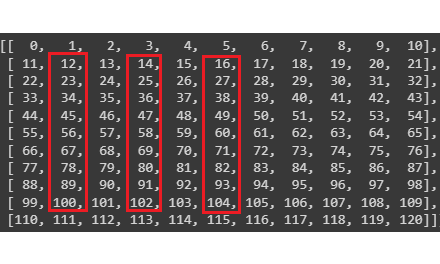


In [176]:
advance_indexing_1 = np.arange(121).reshape(11,11)
print(advance_indexing_1)

# write your code below.


[[  0   1   2   3   4   5   6   7   8   9  10]
 [ 11  12  13  14  15  16  17  18  19  20  21]
 [ 22  23  24  25  26  27  28  29  30  31  32]
 [ 33  34  35  36  37  38  39  40  41  42  43]
 [ 44  45  46  47  48  49  50  51  52  53  54]
 [ 55  56  57  58  59  60  61  62  63  64  65]
 [ 66  67  68  69  70  71  72  73  74  75  76]
 [ 77  78  79  80  81  82  83  84  85  86  87]
 [ 88  89  90  91  92  93  94  95  96  97  98]
 [ 99 100 101 102 103 104 105 106 107 108 109]
 [110 111 112 113 114 115 116 117 118 119 120]]


Answer!

In [177]:
#advance_indexing_1[1:10,1:6:2]

with numpy it is possible to stack arrays, even stack them up vertically or horizontally. 

it is possible to stack  arrays on top of each other vertically with `numpy.vstack`

In [178]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

np.vstack((b,a))

array([[4, 5, 6],
       [1, 2, 3]])

for stacking them up horizontally, there is a function called `numpy.hstack`

In [179]:
a = np.array((1,2,3))
b = np.array((4,5,6))
np.hstack((a,b))

array([1, 2, 3, 4, 5, 6])

You can index each dimension separately.

In [180]:
two_dim_arr = np.arange(25).reshape(5, 5)
two_dim_arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [181]:
x_indices = np.array([3, 4])
y_indices = np.array([1, 2])
two_dim_arr[x_indices, y_indices] # Corresponds to indexing at [3, 1] and [4, 2].

array([16, 22])

# Random Number

NumPy has module `numpy.random` which provides is with the options for generating pseudo-random numbers. For instance, there are various distributions to sample from. It has options for creating distributions as well. 

below, we show some of them with examples. 

for more information, please refer to the documentations. `https://numpy.org/doc/1.16/reference/routines.random.html`


Generates a **random sample** from a given** 1-D **array
- random.choice(`a`, `size=None`, `replace=True`, `p=None`)

In [182]:

import numpy as np

select = ["pizza", "burger", "shakes", "fries", "salad"]
np.random.choice(select, 3)


array(['salad', 'pizza', 'burger'], dtype='<U6')

Return **random integers** from low (inclusive) to high (exclusive).
- np.random.randint(`low`, `high=None`, `size=None`, `dtype=int`)

In [183]:
np.random.randint(0,10,3)

array([4, 0, 3])


Draw samples from a **uniform distribution**.
- random.uniform(`low=0.0`, `high=1.0`, `size=None`)

In [184]:
uniform = np.random.uniform(0, 5, size=10)  
print(uniform)

[3.75072157 4.94430544 3.74082827 1.40221996 3.94639664 0.51613003
 2.23946763 4.54297752 1.46807074 1.43887669]



Draw **random samples** from a normal (Gaussian) distribution.
- random.normal(`loc=0.0`, `scale=1.0`, `size=None`)

In [185]:
normal = np.random.normal(0, 1, size=10)
print(normal)

[-1.05825656  0.65628408 -0.06249159 -1.73865429  0.103163   -0.62166685
  0.27571804 -1.09067489 -0.60998525  0.30641238]


In some cases, you may want the generated random numbers to be the same every time you run your program. In that case, you can set a seed like this before generating.

In [186]:
# for using seed(any number) before producing random numbers, 
# it will prodeuce the same number all the time. 
np.random.seed(1000)
np.random.uniform(0, 1, size=10)

array([0.65358959, 0.11500694, 0.95028286, 0.4821914 , 0.87247454,
       0.21233268, 0.04070962, 0.39719446, 0.2331322 , 0.84174072])

it is also possible to shuffel and array in place with `numpy.random.shuffle`. 

if we want to return a copy of the array shuffled, `numpy.random.permutation` gets the job done! 

In [187]:
array1 = np.random.randint(0,20,10)
print("the original array")
print(array1)

np.random.shuffle(array1)
print("the original array after shuffeling")
print(array1)



the original array
[10  9  4 18  9 18 13 18 10 14]
the original array after shuffeling
[18 13 14  9  4 10 10 18  9 18]


In [188]:
array1 = np.random.randint(0,20,10)
print("the original array")
print(array1)

array_2 = np.random.permutation(array1)
print("the original array after permutation")
print(array1)

print("the shuffled array")
print(array_2)


the original array
[ 7 16 11 17  0 13 18  1 11 14]
the original array after permutation
[ 7 16 11 17  0 13 18  1 11 14]
the shuffled array
[ 0 11 11  7 17 14 18 13 16  1]


# More Numpy

Numpy has a lot more to offer. some of them are left off here. Next week we will dive more deep. It is always recomended to check the documentation for more knolwdge and checking out how different metods works. `https://numpy.org/doc/`